In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from IPython.display import display
import seaborn as sns
from matplotlib import font_manager, rc, rcParams
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
rcParams['axes.unicode_minus'] = False
%matplotlib notebook

## 나이브 베이즈 분류기

- 빠르지만 일반화 성능이 별로임
- 각컬럼을 개별로 취급하여 학습 후 통계적으로 통  
    GaussianNB : 연속적인 데이터
    BernoulliNB : 이진 데이터
    MultinomialNb : 카운트 데이터(갯수 세기)
-parameta
    1. alpha : 커지면 통계적으로 완만해지고 복잡도는 낮아진다. 정확도에 별로 기여하지 않느다.

## 결정트리
- yes/no 질문을 이어 나가면서 학습
- 회귀에 사용시 훈련세트 범위 밖 데이터는 예측 불가능(외삽)

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree = DecisionTreeClassifier(random_state=0).fit(X_train,y_train)

print('train set score: {:.3f}'.format(tree.score(X_train,y_train)))
print('test set score: {:.3f}'.format(tree.score(X_test,y_test)))

train set score: 1.000
test set score: 0.937


In [11]:
def tree_cancer(n):    
    tree = DecisionTreeClassifier(max_depth=n,random_state=0).fit(X_train,y_train)
    #print('train set score: {:.3f}'.format(tree.score(X_train,y_train)))
    print('test set score: {:.3f}'.format(tree.score(X_test,y_test)))

In [13]:
for i in range(1,10):
    tree_cancer(i)

test set score: 0.923
test set score: 0.909
test set score: 0.944
test set score: 0.951
test set score: 0.951
test set score: 0.937
test set score: 0.937
test set score: 0.937
test set score: 0.937


### 시각화하기

In [32]:
from sklearn.tree import export_graphviz

tree = DecisionTreeClassifier(max_depth=4,random_state=0).fit(X_train,y_train)
export_graphviz(tree, out_file='tree4.dot',class_names=['cancer','tumer'],feature_names=cancer.feature_names,impurity=False,filled=True)

In [33]:
!dot -Tpng tree4.dot -o tree4.png

In [34]:
import graphviz
with open('tree4.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

### 트리의 특성 중요도

In [35]:
print('feature importent:\n',tree.feature_importances_)

feature importent:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


<IPython.core.display.Javascript object>


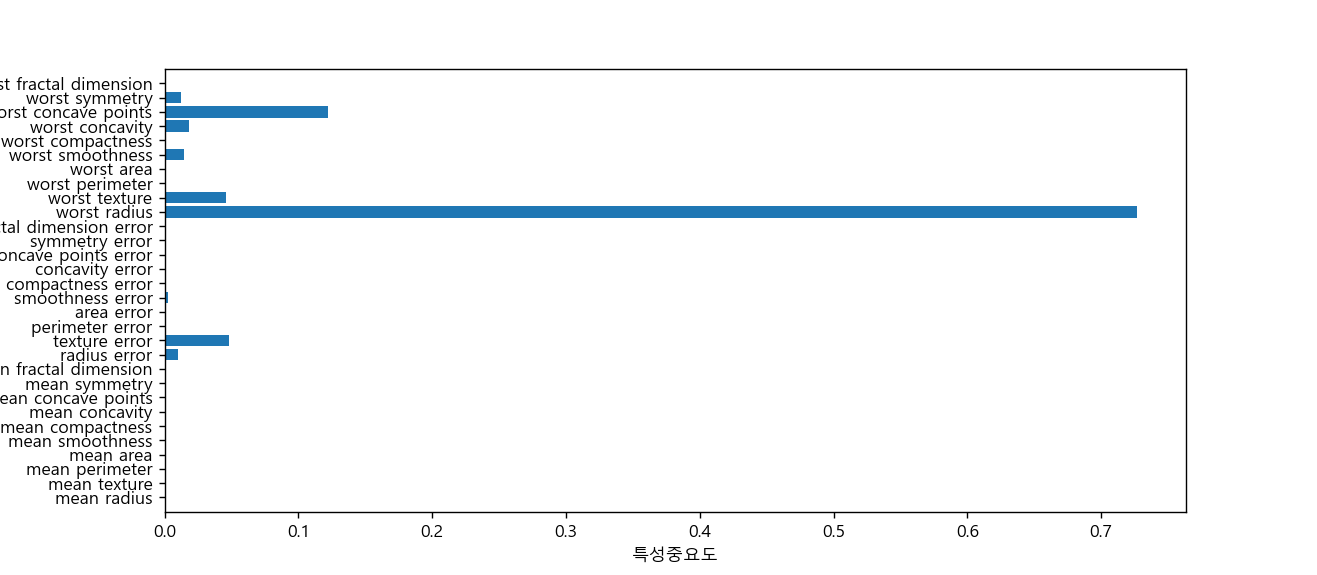

In [38]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel('특성중요도')
    plt.ylabel('특성')
    plt.ylim(-1,n_features)
plot_feature_importances_cancer(tree)

<IPython.core.display.Javascript object>


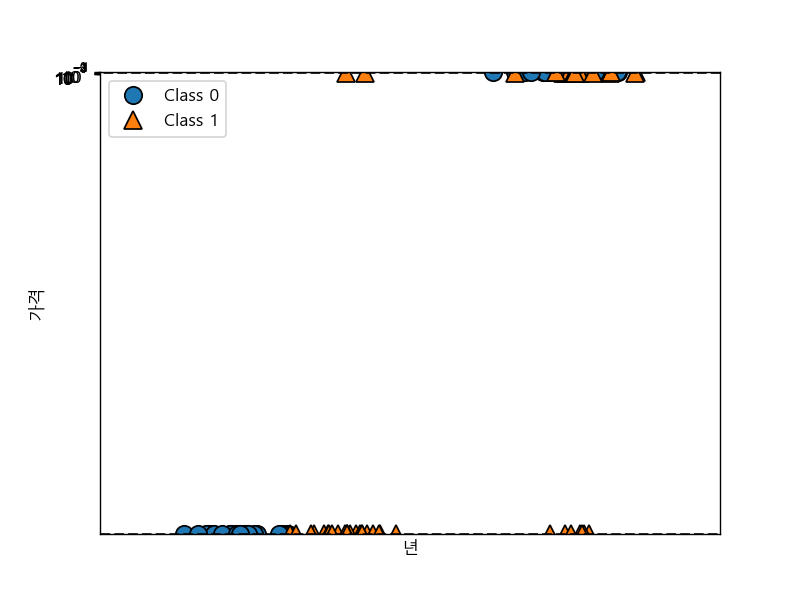

Feature importances: [0. 1.]


ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [40]:
display(mglearn.plots.plot_tree_not_monotone())

<IPython.core.display.Javascript object>


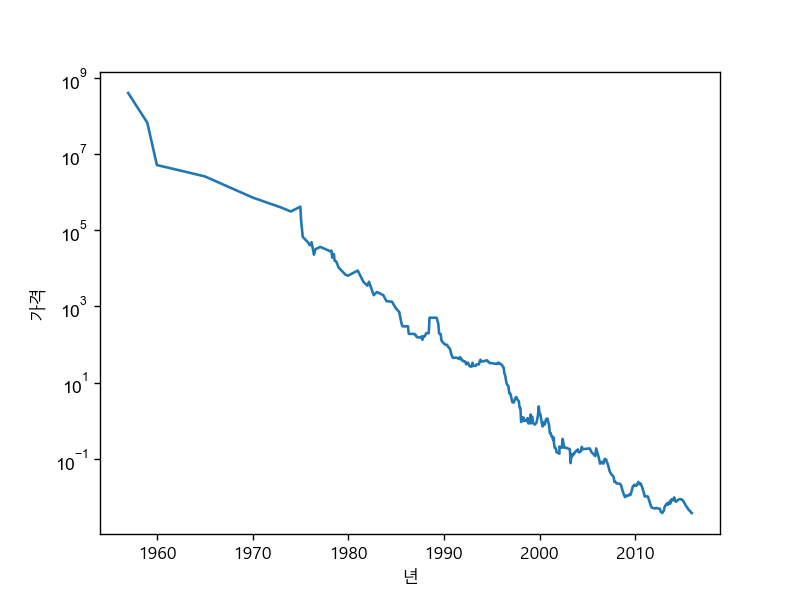

Text(0, 0.5, '가격')

In [69]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,'ram_price.csv'))

plt.figure()
plt.semilogy(ram_prices.date, ram_prices.price)
plt.yticks(fontname='Arial')
plt.xlabel('년')
plt.ylabel('가격')

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >=2000]

X_train = data_train.date[:,np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train,y_train)
lin_reg = LinearRegression().fit(X_train,y_train)

X_all = ram_prices.date[:,np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = lin_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

<IPython.core.display.Javascript object>


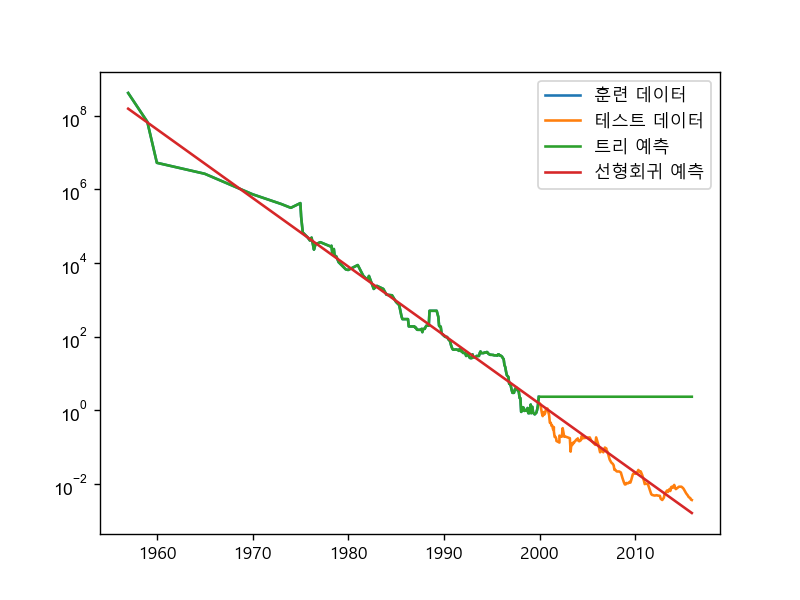

In [68]:
plt.figure()
plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()